# Libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# !unzip /content/drive/MyDrive/archive.zip

# Data Preprocessing

In [ ]:
tf_dataset = tf.keras.utils.image_dataset_from_directory('/content/tea sickness dataset',shuffle=True,batch_size=32,image_size=(256,256))

Found 885 files belonging to 8 classes.


In [ ]:
classes=[]
for i in tf_dataset.class_names:
    classes.append(i)
print(classes)

['Anthracnose', 'algal leaf', 'bird eye spot', 'brown blight', 'gray light', 'healthy', 'red leaf spot', 'white spot']


In [ ]:
train_ds = tf_dataset.take(22)
rem_test_ds = tf_dataset.skip(22)
test_ds = rem_test_ds.take(3)
val_ds = rem_test_ds.skip(3)


In [ ]:
train_ds=train_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(10).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:
resample_rearrange = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
Data_Augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

# Build Model

In [ ]:
    
batch_size=32
image_size=256
channels=3
input_shape = (batch_size,image_size,image_size,channels)
classes = len(tf_dataset.class_names)
model = tf.keras.models.Sequential([
    resample_rearrange,
    Data_Augmentation,
    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(classes,activation='softmax'),
])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
             metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=100,validation_data=val_ds,verbose=1)

Epoch 1/100
22/22 [==============================] - 46s 1s/step - loss: 1.9202 - accuracy: 0.1946 - val_loss: 1.4497 - val_accuracy: 0.3529
Epoch 2/100
22/22 [==============================] - 2s 92ms/step - loss: 1.3731 - accuracy: 0.3707 - val_loss: 1.2099 - val_accuracy: 0.4118
Epoch 3/100
22/22 [==============================] - 2s 90ms/step - loss: 1.1427 - accuracy: 0.4418 - val_loss: 1.2252 - val_accuracy: 0.4235
Epoch 4/100
22/22 [==============================] - 2s 91ms/step - loss: 1.0600 - accuracy: 0.5014 - val_loss: 1.0190 - val_accuracy: 0.5765
Epoch 5/100
22/22 [==============================] - 2s 91ms/step - loss: 1.0234 - accuracy: 0.5312 - val_loss: 0.9328 - val_accuracy: 0.5529
Epoch 6/100
22/22 [==============================] - 2s 92ms/step - loss: 0.9078 - accuracy: 0.5724 - val_loss: 0.8939 - val_accuracy: 0.6000
Epoch 7/100
22/22 [==============================] - 2s 91ms/step - loss: 0.8801 - accuracy: 0.6108 - val_loss: 0.9683 - val_accuracy: 0.6000
Epoch 8

# Prediction

In [ ]:
model.evaluate(test_ds)

3/3 [==============================] - 19s 39ms/step - loss: 0.6437 - accuracy: 0.7812


[0.643653929233551, 0.78125]

Actual label= red leaf spot
1/1 [==============================] - 0s 117ms/step
Predict label= red leaf spot


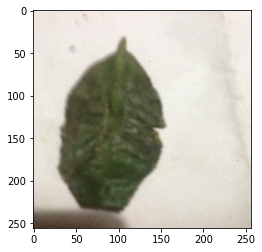

In [ ]:
for img_batch,label in test_ds.take(1):
    print('Actual label=',tf_dataset.class_names[label[1].numpy()])
    batch_pred = model.predict(img_batch)
    print('Predict label=',tf_dataset.class_names[np.argmax(batch_pred[1])])
    plt.imshow(img_batch[1].numpy().astype('uint8'))

In [ ]:
pred_data=[]
actual_data=[]
for img,lbl in test_ds:
    for i in range(32):
        pred = model.predict(img)
        pred_data.append(np.argmax(pred[i]))
        confidence = round(100*(np.max(pred[i])),2)
        actual_class = tf_dataset.class_names[lbl[i]]
        actual_data.append(lbl[i].numpy())
        print(f"Actual:{actual_class},\n Predicted:{tf_dataset.class_names[np.argmax(pred[i])]},\n Confidence:{confidence}%")

1/1 [==============================] - 0s 29ms/step
Actual:white spot,
 Predicted:brown blight,
 Confidence:82.0%
1/1 [==============================] - 0s 29ms/step
Actual:red leaf spot,
 Predicted:red leaf spot,
 Confidence:99.94%
1/1 [==============================] - 0s 31ms/step
Actual:white spot,
 Predicted:white spot,
 Confidence:97.55%
1/1 [==============================] - 0s 31ms/step
Actual:red leaf spot,
 Predicted:red leaf spot,
 Confidence:99.29%
1/1 [==============================] - 0s 30ms/step
Actual:red leaf spot,
 Predicted:red leaf spot,
 Confidence:99.16%
1/1 [==============================] - 0s 31ms/step
Actual:bird eye spot,
 Predicted:bird eye spot,
 Confidence:89.8%
1/1 [==============================] - 0s 28ms/step
Actual:algal leaf,
 Predicted:white spot,
 Confidence:55.57%
1/1 [==============================] - 0s 29ms/step
Actual:algal leaf,
 Predicted:algal leaf,
 Confidence:96.93%
1/1 [==============================] - 0s 32ms/step
Actual:healthy,
 Pre

# Comparison with actual data

1/1 [==============================] - 0s 30ms/step


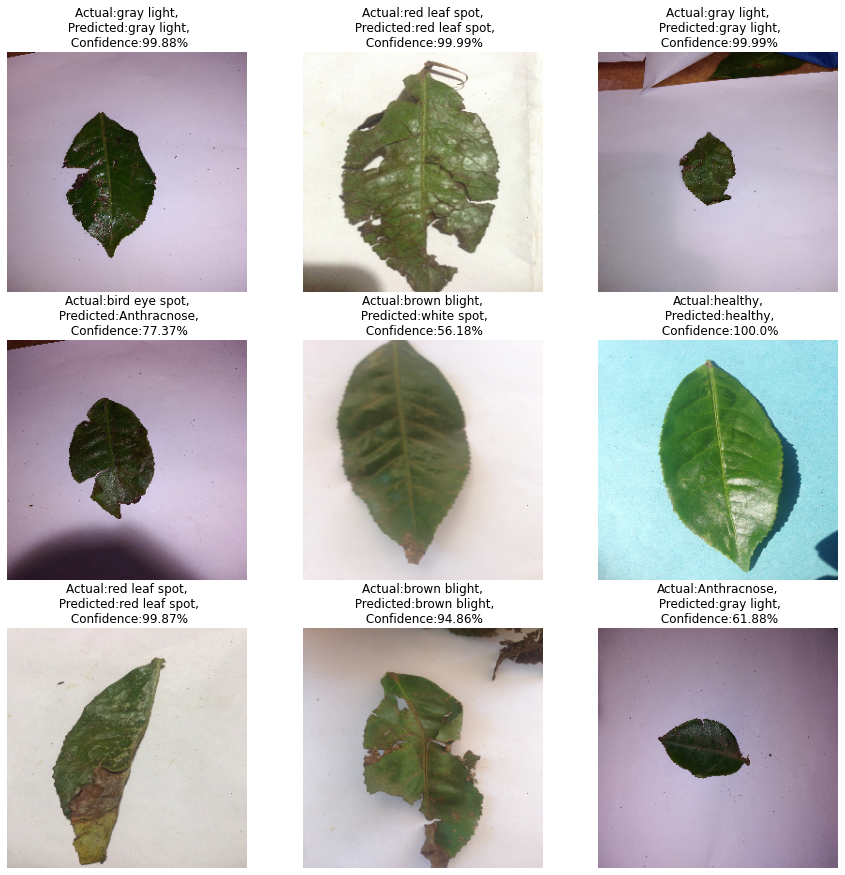

In [ ]:
plt.figure(figsize=(15,15))
for img,lbl in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(img[i].numpy().astype('uint8'))
        pred = model.predict(img)
        pred_class = tf_dataset.class_names[np.argmax(pred[i])]
        confidence = round(100*(np.max(pred[i])),2)
        actual_class = tf_dataset.class_names[lbl[i]]
        plt.title(f"Actual:{actual_class},\n Predicted:{pred_class},\n Confidence:{confidence}%")
        plt.axis('off')

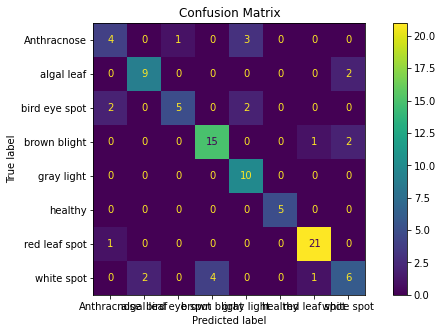

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay,classification_report

fig, ax = plt.subplots(figsize=(10, 5))
ConfusionMatrixDisplay.from_predictions(actual_data, pred_data, ax=ax)
ax.xaxis.set_ticklabels(tf_dataset.class_names)
ax.yaxis.set_ticklabels(tf_dataset.class_names)
_ = ax.set_title(
    "Confusion Matrix"
)

In [ ]:
print(classification_report(actual_data, pred_data))

              precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.82      0.82      0.82        11
           2       0.83      0.56      0.67         9
           3       0.79      0.83      0.81        18
           4       0.67      1.00      0.80        10
           5       1.00      1.00      1.00         5
           6       0.91      0.95      0.93        22
           7       0.60      0.46      0.52        13

    accuracy                           0.78        96
   macro avg       0.77      0.77      0.76        96
weighted avg       0.78      0.78      0.77        96

